# 1.4.3 分岐点精度とF値

In [49]:
from __future__ import division

In [68]:
normal = np.random.normal(1.5, 2, 400)
error = np.random.normal(6, 1.5, 40)

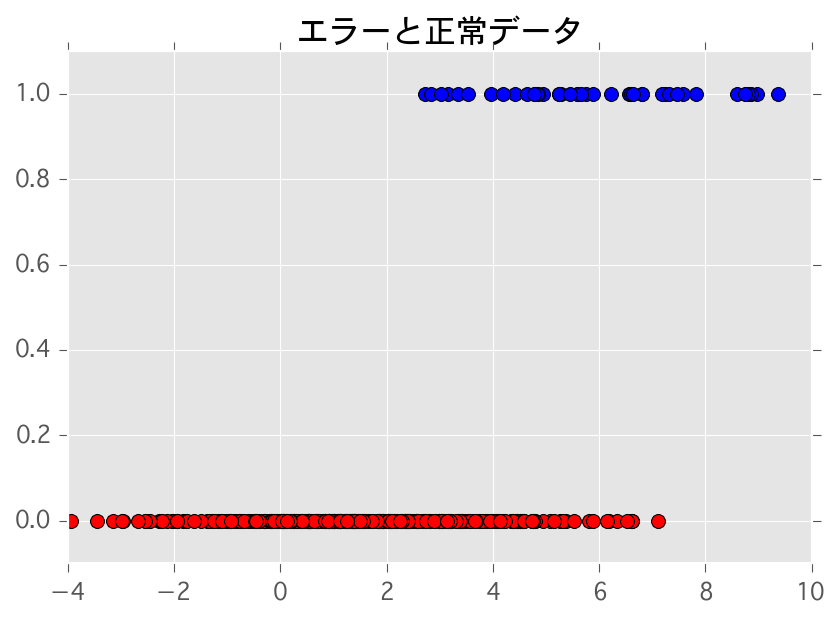

In [69]:
plt.plot(normal, np.zeros(len(normal)), 'ro')
plt.plot(error, np.ones(len(error)), 'bo')
plt.ylim(-0.1, 1.1)
plt.title(u'エラーと正常データ')

In [70]:
def calc_r0(data, threshold):
    return len(data[data <= threshold])/len(data)

def calc_r1(data, threshold):
    return len(data[data >= threshold])/len(data)

In [86]:
X = np.linspace(-6, 10, 100)
r0 = [calc_r0(normal, x) for x in X]
r1 = [calc_r1(error, x) for x in X]

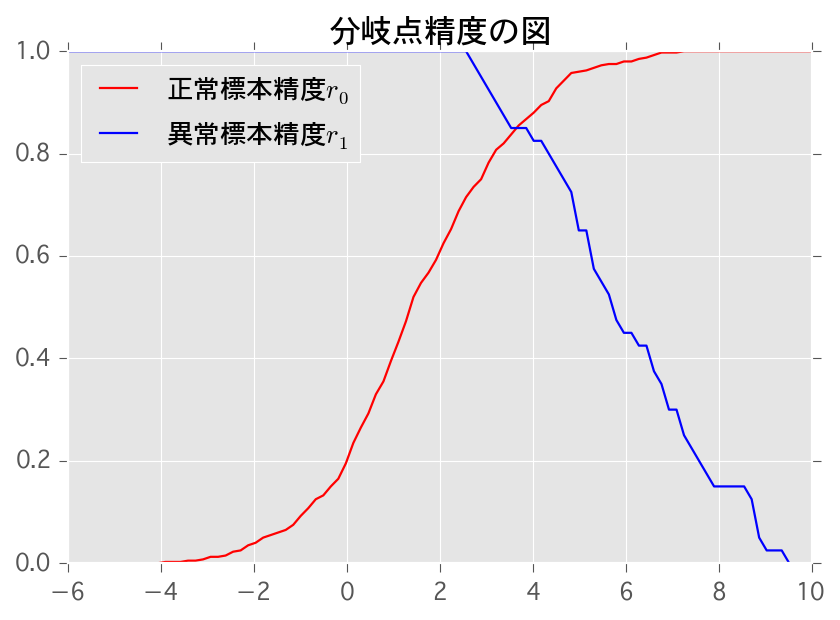

In [87]:
plt.plot(X, r0, 'r', label=u'正常標本精度$r_0$')
plt.plot(X, r1, 'b', label=u'異常標本精度$r_1$')
plt.legend(loc='best')
plt.title(u'分岐点精度の図')

## 調和平均を使った性能分岐点

$\displaystyle
f \equiv \frac{2r_0r_1}{r_0 + r_1} $

In [75]:
def calc_harmonic_mean(normal, error, threshold):
    r0 = calc_r0(normal, threshold)
    r1 = calc_r1(error, threshold)
    return (2 * r0 * r1)/(r0 + r1)

In [88]:
X = np.linspace(-6, 10, 100)
F = [calc_harmonic_mean(normal, error, x) for x in X]

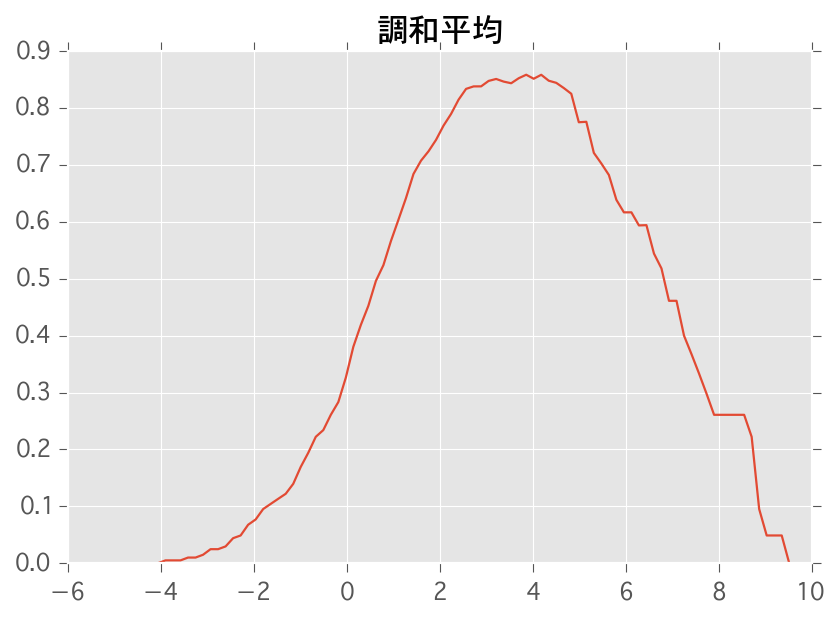

In [89]:
plt.plot(X, F)
plt.title(u'調和平均')

## ROC曲線

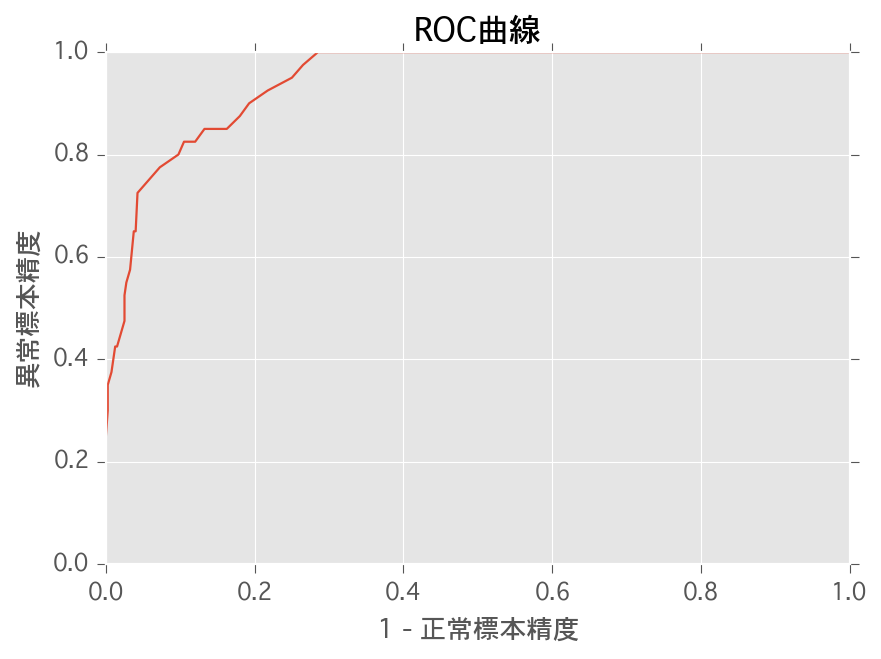

In [96]:
plt.plot(1 - np.array(r0), r1)
plt.title(u'ROC曲線')
plt.xlabel(u'1 - 正常標本精度')
plt.ylabel(u'異常標本精度')